In [27]:
import duckdb as ddb

In [28]:
ddb.load_extension('spatial')

In [29]:
path = 'AIS_2023_06_30.csv'
data = ddb.sql(f"SELECT * from read_csv_auto('{path}', parallel=false)")

In [30]:
data.description

[('MMSI', 'NUMBER', None, None, None, None, None),
 ('BaseDateTime', 'DATETIME', None, None, None, None, None),
 ('LAT', 'NUMBER', None, None, None, None, None),
 ('LON', 'NUMBER', None, None, None, None, None),
 ('SOG', 'NUMBER', None, None, None, None, None),
 ('COG', 'NUMBER', None, None, None, None, None),
 ('Heading', 'NUMBER', None, None, None, None, None),
 ('VesselName', 'STRING', None, None, None, None, None),
 ('IMO', 'STRING', None, None, None, None, None),
 ('CallSign', 'STRING', None, None, None, None, None),
 ('VesselType', 'NUMBER', None, None, None, None, None),
 ('Status', 'NUMBER', None, None, None, None, None),
 ('Length', 'NUMBER', None, None, None, None, None),
 ('Width', 'NUMBER', None, None, None, None, None),
 ('Draft', 'NUMBER', None, None, None, None, None),
 ('Cargo', 'NUMBER', None, None, None, None, None),
 ('TransceiverClass', 'STRING', None, None, None, None, None)]

In [31]:
# Get the unique VesselType values
ddb.sql("SELECT DISTINCT VesselType FROM data")


┌────────────┐
│ VesselType │
│   int64    │
├────────────┤
│         31 │
│         70 │
│         80 │
│         52 │
│         30 │
│         60 │
│         57 │
│         37 │
│         50 │
│         36 │
│          · │
│          · │
│          · │
│         97 │
│         76 │
│         16 │
│         19 │
│         10 │
│         61 │
│         12 │
│         59 │
│         83 │
│        202 │
├────────────┤
│  68 rows   │
│ (20 shown) │
└────────────┘

In [32]:
# Get VesselType 70 to x
cargo = ddb.sql("SELECT MMSI, BaseDateTime, LAT, LON, SOG FROM data WHERE (VesselType BETWEEN 70 AND 79) AND (LAT > 30)")

In [33]:
cargo.describe()

┌─────────┬────────────────────┬─────────────────────┬───────────────────┬────────────────────┬────────────────────┐
│  aggr   │        MMSI        │    BaseDateTime     │        LAT        │        LON         │        SOG         │
│ varchar │       double       │       varchar       │      double       │       double       │       double       │
├─────────┼────────────────────┼─────────────────────┼───────────────────┼────────────────────┼────────────────────┤
│ count   │           466746.0 │ 466746              │          466746.0 │           466746.0 │           466746.0 │
│ mean    │ 403353129.93790627 │ NULL                │ 39.03463625385406 │ -96.41876600926281 │  6.491163716457868 │
│ stddev  │  123670258.0998123 │ NULL                │ 5.934896444204242 │ 21.545979018927408 │ 6.5288399192754305 │
│ min     │        209026000.0 │ 2023-06-30 00:00:00 │          30.00002 │         -138.36847 │                0.0 │
│ max     │        636093182.0 │ 2023-06-30 23:59:59 │          

In [16]:
df = cargo.df()
df

,MMSI,BaseDateTime,LAT,LON,SOG
0,368230820,2023-06-30 00:00:05,39.40230,-73.41012,5.0
1,416482000,2023-06-30 00:00:05,37.81230,-122.33100,3.1
2,636014224,2023-06-30 00:00:00,37.00940,-76.24722,16.6
3,356963000,2023-06-30 00:00:02,36.74691,-75.67446,11.3
4,316004950,2023-06-30 00:00:00,42.96816,-82.41130,0.3
...,...,...,...,...,...
466741,373712000,2023-06-30 23:59:12,36.74538,-75.37339,0.1
466742,316037746,2023-06-30 23:56:17,41.49716,-81.70801,0.0
466743,636019985,2023-06-30 23:56:37,36.13004,-123.01549,3.2
466744,316037746,2023-06-30 23:57:28,41.49716,-81.70801,0.0


In [17]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466746 entries, 0 to 466745
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   MMSI          466746 non-null  int64         
 1   BaseDateTime  466746 non-null  datetime64[ns]
 2   LAT           466746 non-null  float64       
 3   LON           466746 non-null  float64       
 4   SOG           466746 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 17.8 MB


In [111]:
df.to_csv('cargo_sample.csv', index=False)

In [112]:
ddb.load_extension('httpfs')

In [18]:
sample_path = r"https://github.com/jc9677/sample/raw/main/cargo_sample.csv"

ddb.sql(f"SELECT * FROM read_csv_auto('{sample_path}', parallel=false)")

┌───────────┬─────────────────────┬──────────┬────────────┬────────┐
│   MMSI    │    BaseDateTime     │   LAT    │    LON     │  SOG   │
│   int64   │      timestamp      │  double  │   double   │ double │
├───────────┼─────────────────────┼──────────┼────────────┼────────┤
│ 368230820 │ 2023-06-30 00:00:05 │  39.4023 │  -73.41012 │    5.0 │
│ 416482000 │ 2023-06-30 00:00:05 │  37.8123 │   -122.331 │    3.1 │
│ 636014224 │ 2023-06-30 00:00:00 │  37.0094 │  -76.24722 │   16.6 │
│ 356963000 │ 2023-06-30 00:00:02 │ 36.74691 │  -75.67446 │   11.3 │
│ 316004950 │ 2023-06-30 00:00:00 │ 42.96816 │   -82.4113 │    0.3 │
│ 477958900 │ 2023-06-30 00:00:01 │ 35.88115 │  -122.3457 │   16.2 │
│ 316013966 │ 2023-06-30 00:00:05 │ 43.15602 │  -79.19364 │    0.0 │
│ 538005693 │ 2023-06-30 00:00:01 │ 40.14838 │   -68.8698 │   13.1 │
│ 255616000 │ 2023-06-30 00:00:03 │ 46.38745 │ -127.31239 │   10.5 │
│ 257548000 │ 2023-06-30 00:00:04 │ 32.67596 │ -117.92945 │    0.8 │
│     ·     │          ·          

In [19]:
df

,MMSI,BaseDateTime,LAT,LON,SOG
0,368230820,2023-06-30 00:00:05,39.40230,-73.41012,5.0
1,416482000,2023-06-30 00:00:05,37.81230,-122.33100,3.1
2,636014224,2023-06-30 00:00:00,37.00940,-76.24722,16.6
3,356963000,2023-06-30 00:00:02,36.74691,-75.67446,11.3
4,316004950,2023-06-30 00:00:00,42.96816,-82.41130,0.3
...,...,...,...,...,...
466741,373712000,2023-06-30 23:59:12,36.74538,-75.37339,0.1
466742,316037746,2023-06-30 23:56:17,41.49716,-81.70801,0.0
466743,636019985,2023-06-30 23:56:37,36.13004,-123.01549,3.2
466744,316037746,2023-06-30 23:57:28,41.49716,-81.70801,0.0


In [15]:
from osgeo import gdal
import duckdb as ddb

In [16]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

In [21]:
sel = ddb.sql("SELECT MMSI, ST_Point(LON, LAT) AS GEOM, LAT, FLOOR(LAT) AS LAT_INT, LON, FLOOR(LON) AS LON_INT, SOG, EXTRACT(YEAR FROM BaseDateTime) AS Year, EXTRACT(MONTH FROM BaseDateTime) AS Month, EXTRACT(DAY FROM BaseDateTime) AS Day, EXTRACT(HOUR FROM BaseDateTime) AS Hour FROM data")

┌───────────┬──────────────────────┬──────────┬─────────┬────────────┬───┬────────┬───────┬───────┬───────┬───────┐
│   MMSI    │         GEOM         │   LAT    │ LAT_INT │    LON     │ … │  SOG   │ Year  │ Month │  Day  │ Hour  │
│   int64   │       geometry       │  double  │ double  │   double   │   │ double │ int64 │ int64 │ int64 │ int64 │
├───────────┼──────────────────────┼──────────┼─────────┼────────────┼───┼────────┼───────┼───────┼───────┼───────┤
│ 367753210 │ POINT (-90.89974 3…  │ 30.07433 │    30.0 │  -90.89974 │ … │    0.0 │  2023 │     6 │    30 │     0 │
│ 366904350 │ POINT (-88.50795 3…  │  33.9943 │    33.0 │  -88.50795 │ … │    0.0 │  2023 │     6 │    30 │     0 │
│ 367352240 │ POINT (-91.19435 3…  │ 30.44713 │    30.0 │  -91.19435 │ … │    2.0 │  2023 │     6 │    30 │     0 │
│ 367390870 │ POINT (-88.31253 3…  │ 37.04998 │    37.0 │  -88.31253 │ … │    0.0 │  2023 │     6 │    30 │     0 │
│ 368230820 │ POINT (-73.41012 3…  │  39.4023 │    39.0 │  -73.41012 │ …

In [22]:
# Use gdal to write the data GeoParquet
table = sel.to_arrow_table()

In [24]:
# Write the data to GeoParquet
pq.write_to_dataset(table, root_path='PQ2/crgo', partition_cols=['Year', 'Month', 'Day', 'Hour'])

In [25]:
import ogr2ogr

ModuleNotFoundError: No module named 'ogr2ogr'

In [ ]:
# Use ogr2ogr to convert parquet to geoparquet
import pyarrow.parquet as pq
import fastparquet as fp
from fastparquet import write
from shapely.geometry import Point

# Read the parquet dataset
table = pq.read_table('path/to/parquet/dataset.parquet')
latitude = table.column('Latitude').to_pylist()
longitude = table.column('Longitude').to_pylist()

# Create a new DataFrame with Point geometries from the Latitude and Longitude columns
geometry = [Point(xy) for xy in zip(longitude, latitude)]
data = {'geometry': geometry}
for column in table.column_names:
    if column not in ['Latitude', 'Longitude']:
        data[column] = table.column(column).to_pylist()

# Write the new DataFrame as geoparquet
write('path/to/geoparquet/dataset.geoparquet', data, compression='snappy')

In [23]:
#Put the year from BaseDateTime into its own column. Do the same for month, day, hour
#df2 = ddb.sql("SELECT MMSI, LAT, CAST(LAT AS INT) AS LAT_INT, LON, CAST(LON AS INT) AS LON_INT, SOG, EXTRACT(YEAR FROM BaseDateTime) AS Year, EXTRACT(MONTH FROM BaseDateTime) AS Month, EXTRACT(DAY FROM BaseDateTime) AS Day, EXTRACT(HOUR FROM BaseDateTime) AS Hour FROM data").df()


df2 = ddb.sql("SELECT MMSI, LAT, FLOOR(LAT) AS LAT_INT, LON, FLOOR(LON) AS LON_INT, SOG, EXTRACT(YEAR FROM BaseDateTime) AS Year, EXTRACT(MONTH FROM BaseDateTime) AS Month, EXTRACT(DAY FROM BaseDateTime) AS Day, EXTRACT(HOUR FROM BaseDateTime) AS Hour FROM data").df()

In [24]:
df2

,MMSI,LAT,LAT_INT,LON,LON_INT,SOG,Year,Month,Day,Hour
0,367753210,30.07433,30.0,-90.89974,-91.0,0.0,2023,6,30,0
1,366904350,33.99430,33.0,-88.50795,-89.0,0.0,2023,6,30,0
2,367352240,30.44713,30.0,-91.19435,-92.0,2.0,2023,6,30,0
3,367390870,37.04998,37.0,-88.31253,-89.0,0.0,2023,6,30,0
4,368230820,39.40230,39.0,-73.41012,-74.0,5.0,2023,6,30,0
...,...,...,...,...,...,...,...,...,...,...
9899128,338927000,13.42412,13.0,144.67155,144.0,0.0,2023,6,30,22
9899129,338927000,13.42411,13.0,144.67155,144.0,0.0,2023,6,30,22
9899130,338927000,13.42413,13.0,144.67156,144.0,0.0,2023,6,30,23
9899131,338927000,13.42411,13.0,144.67156,144.0,0.0,2023,6,30,23


In [26]:

table = pa.Table.from_pandas(df2)


NameError: name 'df2' is not defined

In [140]:
import sys

pq.write_to_dataset(table, 'PQ/cargo', partitioning=[]
                    #partition_cols=[
                    'Year', 'Month', 'Day', 'Hour'], compression='snappy')

In [144]:
# Create a table from the parquet files
ddb_table = ddb.from_parquet('PQ/cargo/**/*.parquet', hive_partitioning=True)
ddb_table.describe()

┌─────────┬────────────────────┬───────────────────┬────────────────────┬───┬─────────┬─────────┬─────────┬─────────┐
│  aggr   │        MMSI        │        LAT        │        LON         │ … │   Day   │  Hour   │  Month  │  Year   │
│ varchar │       double       │      double       │       double       │   │ varchar │ varchar │ varchar │ varchar │
├─────────┼────────────────────┼───────────────────┼────────────────────┼───┼─────────┼─────────┼─────────┼─────────┤
│ count   │          9899133.0 │         9899133.0 │          9899133.0 │ … │ 9899133 │ 9899133 │ 9899133 │ 9899133 │
│ mean    │ 365257420.89563745 │ 35.85889906722897 │ -92.56665134431779 │ … │ NULL    │ NULL    │ NULL    │ NULL    │
│ stddev  │ 55569625.384467706 │ 7.347200941448143 │ 19.610977894660493 │ … │ NULL    │ NULL    │ NULL    │ NULL    │
│ min     │              111.0 │           0.05843 │         -160.58565 │ … │ 30      │ 0       │ 6       │ 2023    │
│ max     │       1072339762.0 │          84.71642 │    

In [154]:
ddb.sql("SELECT * FROM ddb_table WHERE Year = 2023 AND Month = 6 AND Day = 30 AND Hour = 11").describe()

┌─────────┬───────────────────┬────────────────────┬────────────────────┬───┬─────────┬─────────┬─────────┬─────────┐
│  aggr   │       MMSI        │        LAT         │        LON         │ … │   Day   │  Hour   │  Month  │  Year   │
│ varchar │      double       │       double       │       double       │   │ varchar │ varchar │ varchar │ varchar │
├─────────┼───────────────────┼────────────────────┼────────────────────┼───┼─────────┼─────────┼─────────┼─────────┤
│ count   │          409178.0 │           409178.0 │           409178.0 │ … │ 409178  │ 409178  │ 409178  │ 409178  │
│ mean    │ 365890167.3975287 │ 35.610725145242526 │ -92.16960515558037 │ … │ NULL    │ NULL    │ NULL    │ NULL    │
│ stddev  │ 55369551.51025522 │   7.22817070993615 │ 18.987458173941743 │ … │ NULL    │ NULL    │ NULL    │ NULL    │
│ min     │          368926.0 │            10.8176 │         -159.35732 │ … │ 30      │ 11      │ 6       │ 2023    │
│ max     │      1072211352.0 │           49.86827 │    

### Hive on GitHub

In [8]:
# https://github.com/jc9677/sample/raw/main/PQ/cargo/Year%3D2023/Month%3D6/Day%3D30/Hour%3D0/5065432d677e4539adbe84df6ed299e4-0.parquet
# SELECT * FROM read_parquet('s3://bucket/*/file.parquet', HIVE_PARTITIONING = 1);
#hive_path = r"https://github.com/jc9677/sample/raw/main/PQ/cargo/*/*/*/*/*.parquet"
hive_path = r"https://github.com/jc9677/sample/raw/main/PQ/cargo/"

years = [2023]
months = [m for m in range(1, 13)]
days = [d for d in range(1, 32)]
hours = [h for h in range(0, 24)]

# Make a list of paths to check for parquet files. Use formats like Year%3D2023
paths = []
for y in years:
    for m in months:
        for d in days:
            for h in hours:
                path_to_check = f"Year%3D{y}/Month%3D{m}/Day%3D{d}/Hour%3D{h}" + "/*.parquet"
                #print(path_to_check)
                paths.append(path_to_check)

#for p in paths:
#    hive_path = hive_path + p + "/*.parquet"
#    print(hive_path)
import duckdb as ddb
for p in paths[0:10]:
    # Get the file names in the path
    ddb.sql(f"SELECT * FROM read_parquet('{p}')")

IOException: IO Error: No files found that match the pattern "Year%3D2023/Month%3D1/Day%3D1/Hour%3D0/*.parquet"

In [8]:
# FROM R:
# library("DBI")
# con = dbConnect(duckdb::duckdb(), ":memory:")
# sql <- "INSTALL httpfs; LOAD httpfs;"
# dbExecute(con, sql)

# sql <- r"(SELECT * FROM 'https://raw.githubusercontent.com/RobinL/iris_parquet/main/iris.parquet')"
# dbGetQuery(con, sql)


import pyarrow.parquet as pq
import pyarrow as pa

url = 'https://github.com/jc9677/sample/raw/main/PQ/cargo'

# Create a file-like object from the URL
#file_obj = pa.hdfs.connect(url)
file_obj = pa.hdfs.connect(url)

# Open the Parquet file
parquet_file = pq.ParquetDataset(
    url,
    filesystem=file_obj,
    partitioning='hive'
).read()

# Read the Parquet file into a Pandas DataFrame
#df = parquet_file.to_pandas()

# Print the DataFrame
#print(df)

/var/folders/0q/rtk_4lc54yz5b9h__s66hf180000gn/T/ipykernel_10751/2264666437.py:18: FutureWarning: pyarrow.hdfs.connect is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  file_obj = pa.hdfs.connect(url)


FileNotFoundError: [Errno 2] No such file or directory: 'hadoop'

In [ ]:

ddb.read_parquet(f'{hive_path}', hive_partitioning = True)

#GH_Hive = ddb.sql(f"SELECT * FROM read_parquet('https://github.com/jc9677/sample/raw/main/PQ/cargo/*/*/*/*.parquet', HIVE_PARTITIONING = 1)")


### GDAL fishnet: GEOGRAPHIC

In [2]:
import os, sys
from osgeo import ogr
from math import ceil


In [3]:
#ogr.GetDriver(0)
ogr.GetDriverCount()

for i in range(ogr.GetDriverCount()):
    drv = ogr.GetDriver(i)
    print(f"{i}: {drv.GetName()}")

0: FITS
1: PCIDSK
2: netCDF
3: PDS4
4: VICAR
5: JP2OpenJPEG
6: PDF
7: MBTiles
8: TileDB
9: BAG
10: EEDA
11: OGCAPI
12: ESRI Shapefile
13: MapInfo File
14: UK .NTF
15: LVBAG
16: OGR_SDTS
17: S57
18: DGN
19: OGR_VRT
20: Memory
21: CSV
22: NAS
23: GML
24: GPX
25: LIBKML
26: KML
27: GeoJSON
28: GeoJSONSeq
29: ESRIJSON
30: TopoJSON
31: Interlis 1
32: Interlis 2
33: OGR_GMT
34: GPKG
35: SQLite
36: WAsP
37: PostgreSQL
38: OpenFileGDB
39: DXF
40: CAD
41: FlatGeobuf
42: Geoconcept
43: GeoRSS
44: VFK
45: PGDUMP
46: OSM
47: GPSBabel
48: OGR_PDS
49: WFS
50: OAPIF
51: EDIGEO
52: SVG
53: Idrisi
54: XLS
55: ODS
56: XLSX
57: Elasticsearch
58: Carto
59: AmigoCloud
60: SXF
61: Selafin
62: JML
63: PLSCENES
64: CSW
65: VDV
66: GMLAS
67: MVT
68: NGW
69: MapML
70: Parquet
71: Arrow
72: GTFS
73: TIGER
74: AVCBin
75: AVCE00
76: HTTP


In [81]:
from pprint import pprint

def create_fishnet(outputGridfn,xmin,xmax,ymin,ymax,gridHeight,gridWidth):

    # convert sys.argv to float
    xmin = float(xmin)
    xmax = float(xmax)
    ymin = float(ymin)
    ymax = float(ymax)
    gridWidth = float(gridWidth)
    gridHeight = float(gridHeight)

    # get rows
    rows = ceil((ymax-ymin)/gridHeight)
    print(f'rows: {rows}')
    
    # get columns
    cols = ceil((xmax-xmin)/gridWidth)
    print(f'cols: {cols}')

    # start grid cell envelope
    ringXleftOrigin = xmin
    ringXrightOrigin = xmin + gridWidth
    ringYtopOrigin = ymax
    ringYbottomOrigin = ymax-gridHeight

    # create output file
    #outDriver = ogr.GetDriverByName('GeoJSON')
    #outDriver = ogr.GetDriverByName('ESRI Shapefile')
    outDriver = ogr.GetDriverByName('Parquet')#.CRS('EPSG:4326')
    if os.path.exists(outputGridfn):
        os.remove(outputGridfn)
    outDataSource = outDriver.CreateDataSource(outputGridfn)
    outLayer = outDataSource.CreateLayer(outputGridfn,geom_type=ogr.wkbPolygon, options=['GEOMETRY_NAME=geometry', 'COMPRESSION=SNAPPY'])

    # Add grid_ID field to layer definition
    gridIDField = ogr.FieldDefn("grid_ID", ogr.OFTInteger)
    outLayer.CreateField(gridIDField)


    featureDefn = outLayer.GetLayerDefn()

    # create grid cells
    countcols = 0
    gridID = 1 # Initialize grid_ID
    while countcols < cols:
        countcols += 1

        # reset envelope for rows
        ringYtop = ringYtopOrigin
        ringYbottom =ringYbottomOrigin
        countrows = 0

        while countrows < rows:
            countrows += 1
            ring = ogr.Geometry(ogr.wkbLinearRing)
            ring.AddPoint(ringXleftOrigin, ringYtop)
            ring.AddPoint(ringXrightOrigin, ringYtop)
            ring.AddPoint(ringXrightOrigin, ringYbottom)
            ring.AddPoint(ringXleftOrigin, ringYbottom)
            ring.AddPoint(ringXleftOrigin, ringYtop)
            poly = ogr.Geometry(ogr.wkbPolygon)
            
            #poly.SetCoordinateDimension
            #print(f'poly: {poly}')
            poly.AddGeometry(ring)
            poly.FlattenTo2D()
            # ExportToWkt without Z values
            #print(poly.ExportToWkt())

            # add new geom to layer
            outFeature = ogr.Feature(featureDefn)
            outFeature.SetGeometry(poly)
            outFeature.SetField("grid_ID", gridID)
            outLayer.CreateFeature(outFeature)
            outFeature = None

            # new envelope for next poly
            ringYtop = ringYtop - gridHeight
            ringYbottom = ringYbottom - gridHeight
            
            # Increment grid_ID
            gridID += 1

        # new envelope for next poly
        ringXleftOrigin = ringXleftOrigin + gridWidth
        ringXrightOrigin = ringXrightOrigin + gridWidth

    # Save and close DataSources
    #outDataSource #= None
    # Destroy the datasource
    outDataSource.Destroy()


create_fishnet('grid3.parquet', -150, -120, 45, 62, 1, 1)

rows: 17
cols: 30
poly: POLYGON EMPTY
POLYGON ((-150 62,-149 62,-149 61,-150 61,-150 62))
poly: POLYGON EMPTY
POLYGON ((-150 61,-149 61,-149 60,-150 60,-150 61))
poly: POLYGON EMPTY
POLYGON ((-150 60,-149 60,-149 59,-150 59,-150 60))
poly: POLYGON EMPTY
POLYGON ((-150 59,-149 59,-149 58,-150 58,-150 59))
poly: POLYGON EMPTY
POLYGON ((-150 58,-149 58,-149 57,-150 57,-150 58))
poly: POLYGON EMPTY
POLYGON ((-150 57,-149 57,-149 56,-150 56,-150 57))
poly: POLYGON EMPTY
POLYGON ((-150 56,-149 56,-149 55,-150 55,-150 56))
poly: POLYGON EMPTY
POLYGON ((-150 55,-149 55,-149 54,-150 54,-150 55))
poly: POLYGON EMPTY
POLYGON ((-150 54,-149 54,-149 53,-150 53,-150 54))
poly: POLYGON EMPTY
POLYGON ((-150 53,-149 53,-149 52,-150 52,-150 53))
poly: POLYGON EMPTY
POLYGON ((-150 52,-149 52,-149 51,-150 51,-150 52))
poly: POLYGON EMPTY
POLYGON ((-150 51,-149 51,-149 50,-150 50,-150 51))
poly: POLYGON EMPTY
POLYGON ((-150 50,-149 50,-149 49,-150 49,-150 50))
poly: POLYGON EMPTY
POLYGON ((-150 49,-149 49,

In [35]:
ddb.sql("SELECT * FROM grid3.parquet")

┌─────────┬────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ grid_ID │                                                    geom                                                    │
│  int32  │                                                    blob                                                    │
├─────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│       1 │ \x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\xC0b\xC0\x00\x00\x00\x00\x00\x0…  │
│       2 │ \x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\xC0b\xC0\x00\x00\x00\x00\x00\x8…  │
│       3 │ \x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\xC0b\xC0\x00\x00\x00\x00\x00\x0…  │
│       4 │ \x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\xC0b\xC0\x00\x00\x00\x00\x00\x8…  │
│       5 │ \x01\x03\x00\x00\x00

In [34]:
# Validate the GeoParquet file

os.system("python3 validate_geoparquet.py --check-data grid3.parquet")

grid3.parquet is a valid GeoParquet file


0

In [3]:
from ddb_spatial_tools import *

file_path = 'grid3_CAEAC.parquet'
validate_geoparquet_file(file_path)

grid3_CAEAC.parquet is a valid GeoParquet file


In [44]:
import duckdb as ddb
ddb.load_extension('spatial')
ddb.sql("SELECT grid_ID, ST_GeomFromWKB(geometry) AS GEOM FROM grid3.parquet")

┌─────────┬─────────────────────────────────────────────────────────┐
│ grid_ID │                          GEOM                           │
│  int32  │                        geometry                         │
├─────────┼─────────────────────────────────────────────────────────┤
│       1 │ POLYGON ((-150 62, -150 61, -149 61, -149 62, -150 62)) │
│       2 │ POLYGON ((-150 61, -150 60, -149 60, -149 61, -150 61)) │
│       3 │ POLYGON ((-150 60, -150 59, -149 59, -149 60, -150 60)) │
│       4 │ POLYGON ((-150 59, -150 58, -149 58, -149 59, -150 59)) │
│       5 │ POLYGON ((-150 58, -150 57, -149 57, -149 58, -150 58)) │
│       6 │ POLYGON ((-150 57, -150 56, -149 56, -149 57, -150 57)) │
│       7 │ POLYGON ((-150 56, -150 55, -149 55, -149 56, -150 56)) │
│       8 │ POLYGON ((-150 55, -150 54, -149 54, -149 55, -150 55)) │
│       9 │ POLYGON ((-150 54, -150 53, -149 53, -149 54, -150 54)) │
│      10 │ POLYGON ((-150 53, -150 52, -149 52, -149 53, -150 53)) │
│       · │         

### GDAL fishnet: PROJECTED

In [91]:
import os, sys
from osgeo import ogr, osr
from math import ceil
from pprint import pprint
from pyproj import CRS

In [92]:
crs = CRS.from_string("ESRI:102001")
crs = str(crs.to_wkt())

def create_fishnet(outputGridfn,xmin,xmax,ymin,ymax,gridHeight,gridWidth):

    # convert sys.argv to float
    xmin = float(xmin)
    xmax = float(xmax)
    ymin = float(ymin)
    ymax = float(ymax)
    gridWidth = float(gridWidth)
    gridHeight = float(gridHeight)

    # get rows
    rows = ceil((ymax-ymin)/gridHeight)
    print(f'rows: {rows}')
    
    # get columns
    cols = ceil((xmax-xmin)/gridWidth)
    print(f'cols: {cols}')

    # start grid cell envelope
    ringXleftOrigin = xmin
    ringXrightOrigin = xmin + gridWidth
    ringYtopOrigin = ymax
    ringYbottomOrigin = ymax-gridHeight

    # create output file
    #outDriver = ogr.GetDriverByName('GeoJSON')
    #outDriver = ogr.GetDriverByName('ESRI Shapefile')
    outDriver = ogr.GetDriverByName('Parquet')#.CRS('EPSG:4326')
    if os.path.exists(outputGridfn):
        os.remove(outputGridfn)
    outDataSource = outDriver.CreateDataSource(outputGridfn)
    srs = osr.SpatialReference()


#     wktproj = '''
# PROJCS["Canada_Albers_Equal_Area_Conic",
#     GEOGCS["GCS_North_American_1983",
#         DATUM["D_North_American_1983",
#             SPHEROID["GRS_1980",6378137.0,298.257222101]],
#         PRIMEM["Greenwich",0.0],
#         UNIT["Degree",0.0174532925199433]],
#     PROJECTION["Albers"],
#     PARAMETER["False_Easting",0.0],
#     PARAMETER["False_Northing",0.0],
#     PARAMETER["Central_Meridian",-96.0],
#     PARAMETER["Standard_Parallel_1",50.0],
#     PARAMETER["Standard_Parallel_2",70.0],
#     PARAMETER["Latitude_Of_Origin",40.0],
#     UNIT["Meter",1.0]]
# '''
    srs.ImportFromWkt(crs)

    outLayer = outDataSource.CreateLayer(outputGridfn, srs=srs, geom_type=ogr.wkbPolygon, options=['GEOMETRY_NAME=geometry', 'COMPRESSION=SNAPPY'])

    # Add grid_ID field to layer definition
    gridIDField = ogr.FieldDefn("grid_ID", ogr.OFTInteger)
    outLayer.CreateField(gridIDField)


    featureDefn = outLayer.GetLayerDefn()

    # create grid cells
    countcols = 0
    gridID = 1 # Initialize grid_ID
    while countcols < cols:
        countcols += 1

        # reset envelope for rows
        ringYtop = ringYtopOrigin
        ringYbottom =ringYbottomOrigin
        countrows = 0

        while countrows < rows:
            countrows += 1
            ring = ogr.Geometry(ogr.wkbLinearRing)
            ring.AddPoint(ringXleftOrigin, ringYtop)
            ring.AddPoint(ringXrightOrigin, ringYtop)
            ring.AddPoint(ringXrightOrigin, ringYbottom)
            ring.AddPoint(ringXleftOrigin, ringYbottom)
            ring.AddPoint(ringXleftOrigin, ringYtop)
            poly = ogr.Geometry(ogr.wkbPolygon)
            
            #poly.SetCoordinateDimension
            #print(f'poly: {poly}')
            poly.AddGeometry(ring)
            poly.FlattenTo2D()
            # ExportToWkt without Z values
            #print(poly.ExportToWkt())

            # add new geom to layer
            outFeature = ogr.Feature(featureDefn)
            outFeature.SetGeometry(poly)
            outFeature.SetField("grid_ID", gridID)
            outLayer.CreateFeature(outFeature)
            outFeature = None

            # new envelope for next poly
            ringYtop = ringYtop - gridHeight
            ringYbottom = ringYbottom - gridHeight
            
            # Increment grid_ID
            gridID += 1

        # new envelope for next poly
        ringXleftOrigin = ringXleftOrigin + gridWidth
        ringXrightOrigin = ringXrightOrigin + gridWidth

    # Save and close DataSources
    #outDataSource #= None
    # Destroy the datasource
    outDataSource.Destroy()


create_fishnet('grid3_CAEAC.parquet', -1929000, -1817895, 1377474, 1452153, 3000, 3000)

rows: 25
cols: 38


In [81]:
#import duckdb as ddb
#ddb.sql("SELECT * FROM grid3_CAEAC.parquet")

import duckdb as ddb
ddb.load_extension('spatial')
ddb.sql("SELECT grid_ID, ST_GeomFromWKB(geometry) AS GEOM FROM grid3_CAEAC.parquet")

┌─────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ grid_ID │                                                 GEOM                                                 │
│  int32  │                                               geometry                                               │
├─────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────┤
│       1 │ POLYGON ((-1929000 1452153, -1929000 1449153, -1926000 1449153, -1926000 1452153, -1929000 1452153)) │
│       2 │ POLYGON ((-1929000 1449153, -1929000 1446153, -1926000 1446153, -1926000 1449153, -1929000 1449153)) │
│       3 │ POLYGON ((-1929000 1446153, -1929000 1443153, -1926000 1443153, -1926000 1446153, -1929000 1446153)) │
│       4 │ POLYGON ((-1929000 1443153, -1929000 1440153, -1926000 1440153, -1926000 1443153, -1929000 1443153)) │
│       5 │ POLYGON ((-1929000 1440153, -1929000 1437153, -1926000 1437153, -192

In [88]:
import geopandas as gpd
df = ddb.sql("SELECT grid_ID, ST_GeomFromWKB(geometry) AS GEOM, ST_AsText(GEOM) AS gpd_geom FROM grid3_CAEAC.parquet").df()
df

,grid_ID,GEOM,gpd_geom
0,1,"[0, 2, 96, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,...","POLYGON ((-1929000 1452153, -1929000 1449153, ..."
1,2,"[0, 2, 96, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,...","POLYGON ((-1929000 1449153, -1929000 1446153, ..."
2,3,"[0, 2, 96, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,...","POLYGON ((-1929000 1446153, -1929000 1443153, ..."
3,4,"[0, 2, 96, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,...","POLYGON ((-1929000 1443153, -1929000 1440153, ..."
4,5,"[0, 2, 96, 0, 190, 127, 0, 0, 2, 0, 0, 0, 1, 0...","POLYGON ((-1929000 1440153, -1929000 1437153, ..."
...,...,...,...
945,946,"[0, 2, 96, 0, 53, 44, 45, 49, 2, 0, 0, 0, 1, 0...","POLYGON ((-1818000 1392153, -1818000 1389153, ..."
946,947,"[0, 2, 96, 0, 45, 49, 57, 50, 2, 0, 0, 0, 1, 0...","POLYGON ((-1818000 1389153, -1818000 1386153, ..."
947,948,"[0, 2, 96, 0, 57, 50, 55, 53, 2, 0, 0, 0, 1, 0...","POLYGON ((-1818000 1386153, -1818000 1383153, ..."
948,949,"[0, 2, 96, 0, 89, 92, 110, 80, 2, 0, 0, 0, 1, ...","POLYGON ((-1818000 1383153, -1818000 1380153, ..."


In [89]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['gpd_geom']))
gdf.set_crs("ESRI:102001", inplace=True)
gdf.crs

<Projected CRS: ESRI:102001>
Name: Canada_Albers_Equal_Area_Conic
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada - onshore and offshore - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon.
- bounds: (-141.01, 38.21, -40.73, 86.46)
Coordinate Operation:
- name: Canada_Albers_Equal_Area_Conic
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

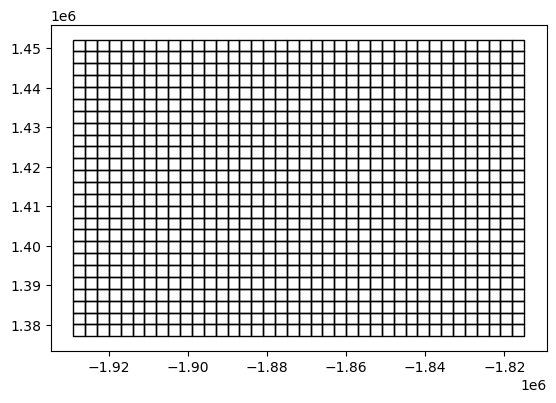

In [90]:
gdf.plot(facecolor='none')


### Read geoparquet using ogr, run SQL query

In [23]:
from osgeo import ogr

# Open the data source
ds = ogr.Open('grid3.parquet')

# Get the layer
layer = ds.GetLayer()
#print(layer)
# Execute the SQL query
query = "grid_ID > 500"#SELECT * FROM layer" # WHERE field = 'value'"
layer.SetAttributeFilter(query)

# Loop through the features
for feature in layer:
    # Do something with the feature
    print((feature.GetField('grid_ID')), feature.GetGeometryRef().ExportToWkt())

# Close the data source
ds = None

501 POLYGON ((-121 55,-121 54,-120 54,-120 55,-121 55))
502 POLYGON ((-121 54,-121 53,-120 53,-120 54,-121 54))
503 POLYGON ((-121 53,-121 52,-120 52,-120 53,-121 53))
504 POLYGON ((-121 52,-121 51,-120 51,-120 52,-121 52))
505 POLYGON ((-121 51,-121 50,-120 50,-120 51,-121 51))
506 POLYGON ((-121 50,-121 49,-120 49,-120 50,-121 50))
507 POLYGON ((-121 49,-121 48,-120 48,-120 49,-121 49))
508 POLYGON ((-121 48,-121 47,-120 47,-120 48,-121 48))
509 POLYGON ((-121 47,-121 46,-120 46,-120 47,-121 47))
510 POLYGON ((-121 46,-121 45,-120 45,-120 46,-121 46))


### Convert MarCad csv to GeoParquet using OGR

In [2]:
import duckdb as ddb
ddb.load_extension('spatial')

csv = 'AIS_2023_06_30.csv'
source = ddb.sql(f"SELECT *, ST_AsWKB(ST_POINT(LON, LAT)) AS geometry FROM read_csv_auto('{csv}', parallel=false)")
source

┌───────────┬─────────────────────┬──────────┬────────────┬───┬───────┬──────────────────┬──────────────────────┐
│   MMSI    │    BaseDateTime     │   LAT    │    LON     │ … │ Cargo │ TransceiverClass │       geometry       │
│   int64   │      timestamp      │  double  │   double   │   │ int64 │     varchar      │       wkb_blob       │
├───────────┼─────────────────────┼──────────┼────────────┼───┼───────┼──────────────────┼──────────────────────┤
│ 367753210 │ 2023-06-30 00:00:02 │ 30.07433 │  -90.89974 │ … │    31 │ A                │ POINT (-90.89974 3…  │
│ 366904350 │ 2023-06-30 00:00:03 │  33.9943 │  -88.50795 │ … │    31 │ A                │ POINT (-88.50795 3…  │
│ 367352240 │ 2023-06-30 00:00:03 │ 30.44713 │  -91.19435 │ … │    52 │ A                │ POINT (-91.19435 3…  │
│ 367390870 │ 2023-06-30 00:00:04 │ 37.04998 │  -88.31253 │ … │    57 │ A                │ POINT (-88.31253 3…  │
│ 368230820 │ 2023-06-30 00:00:05 │  39.4023 │  -73.41012 │ … │    70 │ A               

In [83]:
import os

prq = os.path.splitext(csv)[0] + '.parquet'
ddb.sql(f"COPY source TO '{prq}' (FORMAT PARQUET)")


In [28]:
# Register all OGR drivers
#ogr.RegisterAll()

# Open source Parquet file
src_ds = ogr.Open("AIS_2023_06_30.parquet", 0)
if src_ds is None:
    print("Could not open source dataset")
    exit(1)

# Get the source layer
src_layer = src_ds.GetLayer()

#for f in src_layer:
    #print(f.GetField('geom'))#, f.GetGeometryRef().ExportToWkt())

# Create destination Parquet file
dest_driver = ogr.GetDriverByName("Parquet")
if dest_driver is None:
    print("Parquet driver is not available")
    exit(1)

dest_ds = dest_driver.CreateDataSource("AIS_2023_06_30.geoparquet")
if dest_ds is None:
    print("Could not create destination dataset")
    exit(1)

# Create destination layer
dest_layer = dest_ds.CreateLayer("layer_name", geom_type=ogr.wkbPoint, options=['GEOMETRY_NAME=geometry', 'COMPRESSION=SNAPPY']) #geom_type=src_layer.GetGeomType())

# Get a list of the fields in the source layer and add them to the destination layer
src_defn = src_layer.GetLayerDefn()
for i in range(src_defn.GetFieldCount()):
    if src_defn.GetFieldDefn(i).GetName() == 'geometry':
        continue
    field_defn = src_defn.GetFieldDefn(i)
    print(field_defn.GetName(), ":", field_defn.GetTypeName())
    dest_layer.CreateField(field_defn)

# Loop through features to copy them
src_feature = src_layer.GetNextFeature()
#print(src_feature)

count = 0
while src_feature and count < 100000:
    #print(src_feature.GetField('geometry'))
    dest_feature = ogr.Feature(dest_layer.GetLayerDefn())
    point = ogr.Geometry(ogr.wkbPoint)
    point.AddPoint_2D(src_feature.GetField('LON'), src_feature.GetField('LAT'))
    #point.AddGeometry
    #dest_feature.SetFrom(src_feature)
    dest_feature.SetGeometry(point)
    for i in range(src_feature.GetFieldCount()-1):
        dest_feature.SetField(i, src_feature.GetField(i))

    dest_layer.CreateFeature(dest_feature)
    src_feature = src_layer.GetNextFeature()
    count += 1

# Close datasets
src_ds = None
dest_ds = None



MMSI : Integer64
BaseDateTime : DateTime
LAT : Real
LON : Real
SOG : Real
COG : Real
Heading : Real
VesselName : String
IMO : String
CallSign : String
VesselType : Integer64
Status : Integer64
Length : Integer64
Width : Integer64
Draft : Real
Cargo : Integer64
TransceiverClass : String


In [29]:
import duckdb as ddb
ddb.load_extension('spatial')
ddb.sql("SELECT *, ST_GeomFromWKB(geometry) AS GEOM FROM read_parquet('AIS_2023_06_30.geoparquet')")

┌───────────┬─────────────────────┬──────────┬───┬──────────────────┬──────────────────────┬──────────────────────┐
│   MMSI    │    BaseDateTime     │   LAT    │ … │ TransceiverClass │       geometry       │         GEOM         │
│   int64   │      timestamp      │  double  │   │     varchar      │         blob         │       geometry       │
├───────────┼─────────────────────┼──────────┼───┼──────────────────┼──────────────────────┼──────────────────────┤
│ 367753210 │ 2023-06-30 00:00:02 │ 30.07433 │ … │ A                │ \x01\x01\x00\x00\x…  │ POINT (-90.89974 3…  │
│ 366904350 │ 2023-06-30 00:00:03 │  33.9943 │ … │ A                │ \x01\x01\x00\x00\x…  │ POINT (-88.50795 3…  │
│ 367352240 │ 2023-06-30 00:00:03 │ 30.44713 │ … │ A                │ \x01\x01\x00\x00\x…  │ POINT (-91.19435 3…  │
│ 367390870 │ 2023-06-30 00:00:04 │ 37.04998 │ … │ A                │ \x01\x01\x00\x00\x…  │ POINT (-88.31253 3…  │
│ 368230820 │ 2023-06-30 00:00:05 │  39.4023 │ … │ A                │ \x

In [73]:
# Validate the GeoParquet file
os.system("python3 validate_geoparquet.py --check-data AIS_2023_06_30.geoparquet")

AIS_2023_06_30.geoparquet: 'geo' file metadata item missing


256

### GitHub Issue

In [1]:
import duckdb as ddb
ddb.load_extension('spatial')


In [2]:

# Create a table with columns for Longitude and Latitude
ddb.sql("CREATE OR REPLACE TABLE test (Longitude DOUBLE, Latitude DOUBLE)")


In [3]:

# Insert a row with a point
ddb.sql("INSERT INTO test VALUES (-123.12345, 49.12345)")
ddb.sql("INSERT INTO test VALUES (-123.12345, 49.02345)")


In [4]:


ddb.sql("SELECT *, ST_Point(Longitude, Latitude) AS GEOM, ST_Transform(ST_FlipCoordinates(GEOM), 'EPSG:4326', 'ESRI:102001') AS AEAC FROM test")

unable to open database file
Cannot open https://cdn.proj.org/us_noaa_WO.tif: Network functionality not available


┌────────────┬──────────┬─────────────────────────────┬─────────────────────────────────────────────┐
│ Longitude  │ Latitude │            GEOM             │                    AEAC                     │
│   double   │  double  │          geometry           │                  geometry                   │
├────────────┼──────────┼─────────────────────────────┼─────────────────────────────────────────────┤
│ -123.12345 │ 49.12345 │ POINT (-123.12345 49.12345) │ POINT (-1930488.849258097 1393621.32509929) │
│ -123.12345 │ 49.02345 │ POINT (-123.12345 49.02345) │ POINT (Infinity Infinity)                   │
└────────────┴──────────┴─────────────────────────────┴─────────────────────────────────────────────┘

In [7]:
ext_df = ddb.sql("SELECT extension_name, install_path FROM duckdb_extensions()").df()
ext_df

,extension_name,install_path
0,autocomplete,
1,fts,(BUILT-IN)
2,httpfs,/Users/jeff/.duckdb/extensions/v0.8.1/osx_amd6...
3,icu,(BUILT-IN)
4,inet,
5,jemalloc,
6,json,(BUILT-IN)
7,motherduck,
8,parquet,(BUILT-IN)
9,postgres_scanner,
